In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline 

In [95]:
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split
# Import scikit-Learn module for the algorithm/modeL: Linear Regression
from sklearn.linear_model import LinearRegression
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [44]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv") #reading the dataset in a dataframe using Pandas

In [45]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [56]:
list (df.columns)


['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [57]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


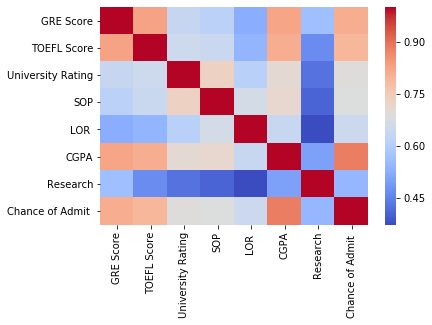

In [76]:
#Visualising the data using heatmap
pyplot.figure()
sns.heatmap(df.corr(),cmap='coolwarm')
pyplot.show()

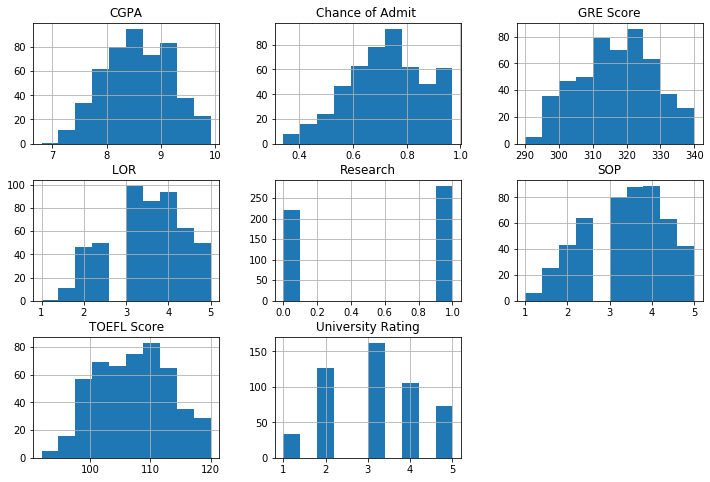

In [65]:
#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()

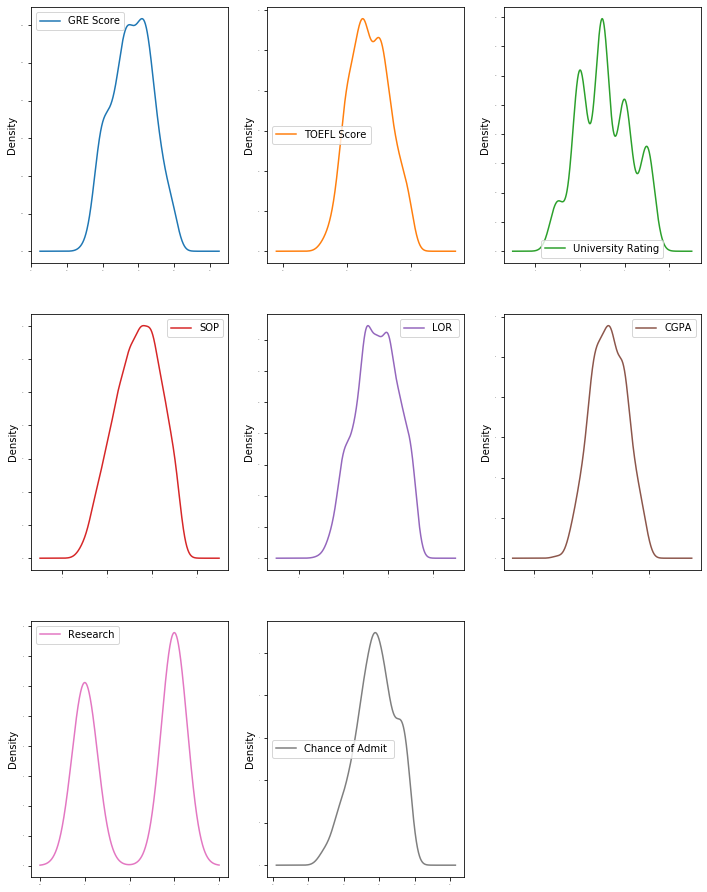

In [66]:
# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

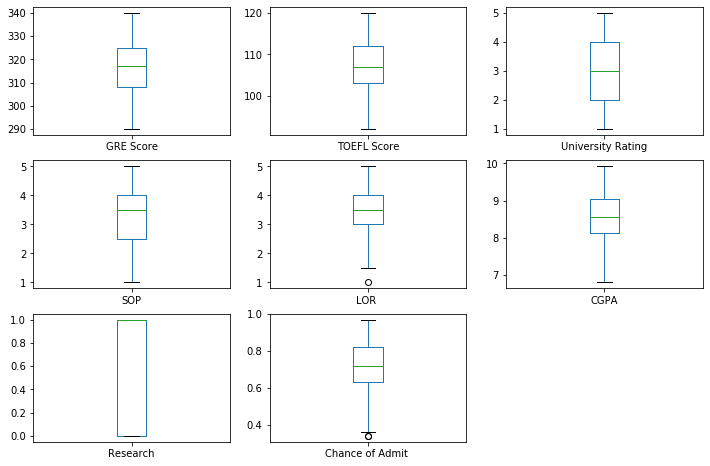

In [67]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

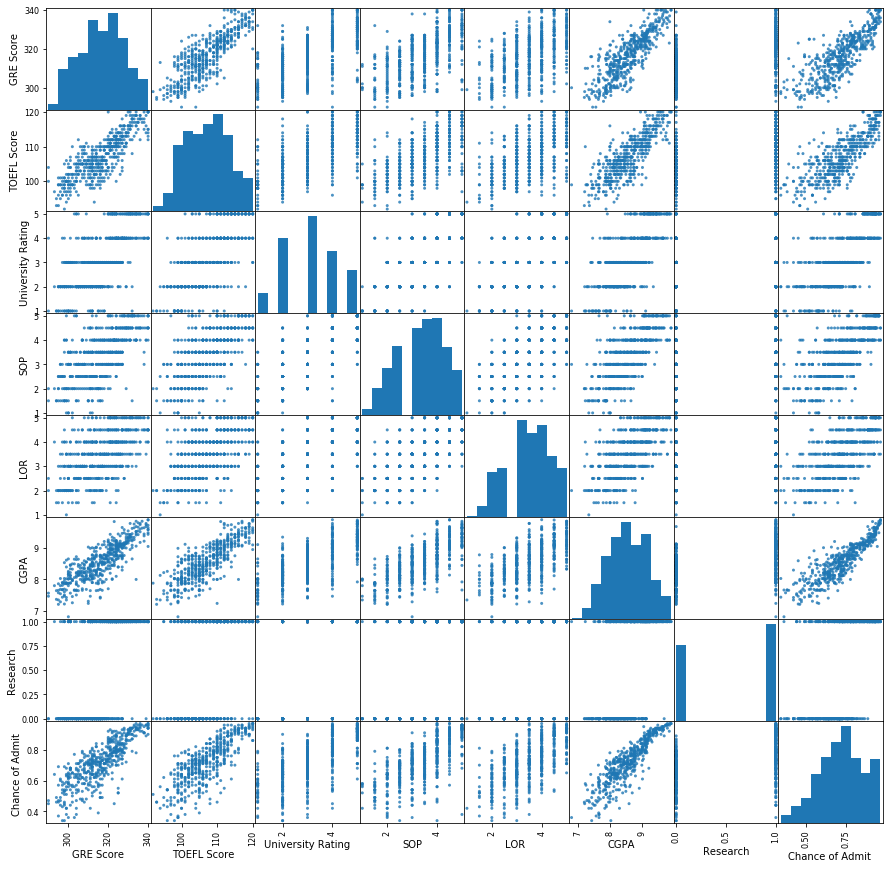

In [70]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

In [78]:
# Extract a sub-dataset from the original one -- > dataframe: df2
df2 = df[['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']]

In [79]:
# # Store dataframe values into a numpy array
array = df2.values
# # separate array into input and output components by slicing
# # For X (input)[:, 3] --> all the rows, columns from 0 - 2 (5 - 1)
X = array[:,0:3]
# # For Y (output)[:, 3] --> all the rows, column index 3 (Last column)
Y = array[:,3]

In [83]:
# Split the dataset --> training sub-dataset: 67%; test sub-dataset:
test_size = 0.33
# Selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7
# Split the dataset (both input & outout) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [86]:
# Build the model
model = LinearRegression()
# Train the model using the training sub-dataset
model.fit(X_train, Y_train)
# Print out the coefficients and the intercept
# print intercept and coefficients
print (model.intercept_)
print (model.coef_)

-1.5682661292103228
[0.00194986 0.00378894 0.14772384]


In [91]:
model.predict([[337,118,9.65]])

array([0.96146533])

In [93]:
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 81.861%


In [96]:
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)

In [99]:
print('MSE : ', mean_squared_error(Y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(Y_test,predictions)))

MSE :  0.0036054866179999205
RMSE :  0.06004570440922415
